<img width="10%" alt="Naas" src="https://landen.imgix.net/jtci2pxwjczr/assets/5ice39g4.png?w=160"/>

# Google Analytics - Follow number of visitors daily
<a href="https://app.naas.ai/user-redirect/naas/downloader?url=https://raw.githubusercontent.com/jupyter-naas/awesome-notebooks/master/Google%20Analytics/GoogleAnalytics_Get_stats_per_country.ipynb" target="_parent"><img src="https://naasai-public.s3.eu-west-3.amazonaws.com/open_in_naas.svg"/></a>

**Tags:** #googleanalytics #analytics #marketing #csv #html #plotly #image #png

**Author:** [Florent Ravenel](https://www.linkedin.com/in/ACoAABCNSioBW3YZHc2lBHVG0E_TXYWitQkmwog/)

## Input

### Import library

In [14]:
import plotly.graph_objects as go
import naas
import datetime
import pandas as pd
from naas_drivers import googleanalytics

### Setup Google Analytics

👉 Create your own <a href="">Google API JSON credential</a>

In [15]:
# Get your credential from Google Cloud Platform
json_path = 'naas-googleanalytics.json'

# Get view id from google analytics
view_id = "228952707"

# Setup your data parameters
dimensions = "daily" #hourly, daily, weekly, monthly
start_date = "30daysAgo" #XdaysAgo or date in ISO format %Y-%m-%d
end_date = "today" #Today or date in ISO format %Y-%m-%d

### Setup Outputs

In [16]:
# Chart title
title = "Visitors"

# Outputs path
name_output = f"Google_Analytics_visitors_{dimensions}"
csv_output = f"{name_output}.csv"
image_output = f"{name_output}.png"
html_output = f"{name_output}.html"

## Model

### Get trend

In [17]:
df = googleanalytics.connect(json_path, view_id).users.get_trend(dimensions, start_date, end_date)
df

,DATE_ISO,DATE,METRIC,VALUE,VALUE_COMP,VARV,VARP
0,2022-03-23,2022-03-23,users,57.0,0.0,57.0,inf
1,2022-03-24,2022-03-24,users,59.0,57.0,2.0,0.035088
2,2022-03-25,2022-03-25,users,50.0,59.0,-9.0,-0.152542
3,2022-03-26,2022-03-26,users,27.0,50.0,-23.0,-0.460000
4,2022-03-27,2022-03-27,users,24.0,27.0,-3.0,-0.111111
5,2022-03-28,2022-03-28,users,106.0,24.0,82.0,3.416667
6,2022-03-29,2022-03-29,users,90.0,106.0,-16.0,-0.150943
7,2022-03-30,2022-03-30,users,77.0,90.0,-13.0,-0.144444
8,2022-03-31,2022-03-31,users,91.0,77.0,14.0,0.181818
9,2022-04-01,2022-04-01,users,79.0,91.0,-12.0,-0.131868


### Plotting linechart

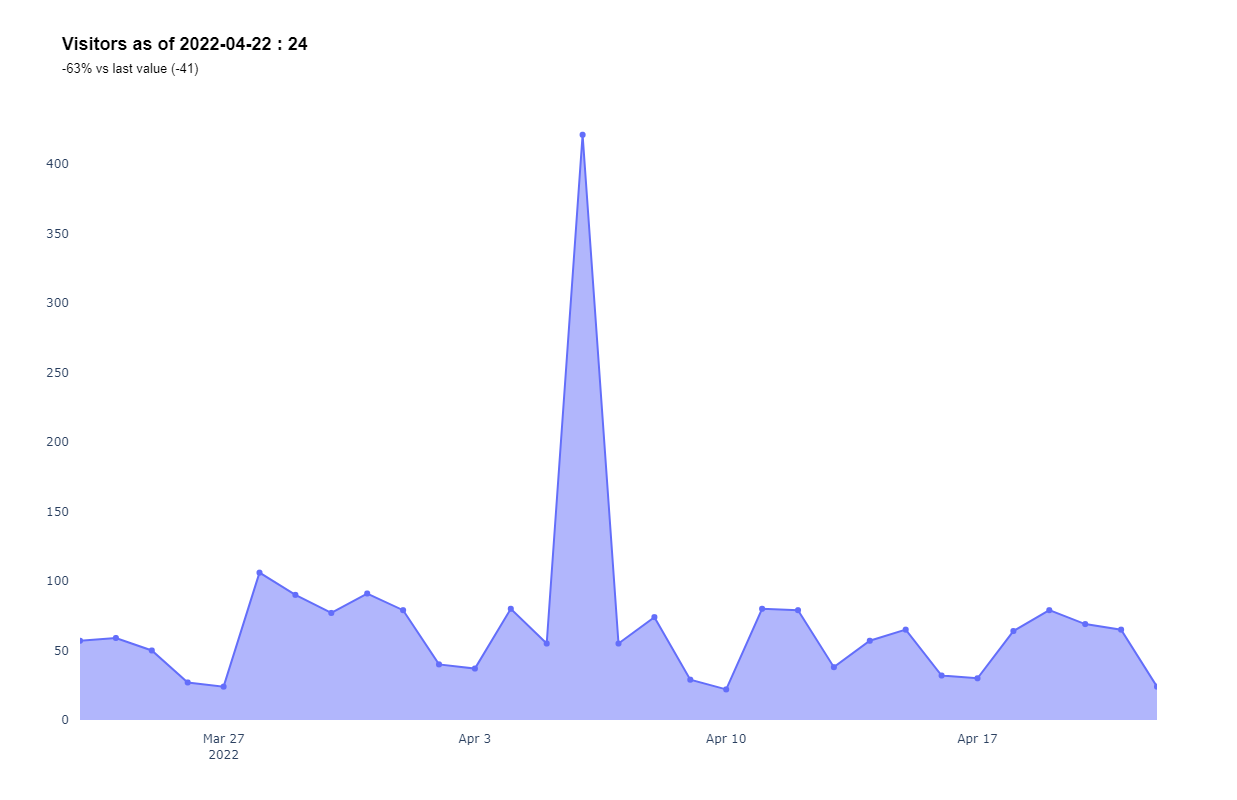

In [18]:
def create_linechart(df: pd.DataFrame, label, value, varv, varp, title):
    """
    Plot linechart as an area chart in Plotly.
    """
    # Prep data
    df["VALUE_D"] = df[value].map("{:,.0f}".format).str.replace(",", " ")
    df["VARV_D"] = df[varv].map("{:,.0f}".format).str.replace(",", " ")
    df.loc[df[varv] > 0, "VARV_D"] = "+" + df["VARV_D"]
    df["VARP_D"] = df[varp].map("{:,.0%}".format).str.replace(",", " ")
    df.loc[df[varp] > 0, "VARP_D"] = "+" + df["VARP_D"]    

    # Create hovertext
    df["TEXT"] = (f"<b>{title} as of " + df[label].astype(str) + " : " + df["VALUE_D"] + "</b><br><span style='font-size: 13px;'>" + df["VARP_D"] + " vs last value (" + df["VARV_D"] + ")</span>")
    
    # Get subtitle
    title_display = df.loc[df.index[-1], "TEXT"] 
    
    # Create data
    data = go.Scatter(
        x=df[label],
        y=df[value],
        stackgroup="one",
        text=df["TEXT"],
        hoverinfo="text",
    )
    
    # Create layout
    layout = go.Layout(
        title=title_display,
        title_font=dict(family="Arial", size=18, color="black"),
        plot_bgcolor="#ffffff",
        width=1200,
        height=800,
        margin_pad=10,
    )
    fig = go.Figure(data=data, layout=layout)
    fig.update_traces(mode='lines+markers')
    return fig

fig = create_linechart(df, "DATE", "VALUE", "VARV", "VARP", title)
fig

## Output

### Save and share csv

In [ ]:
df.to_csv(csv_output, index=False)

# Share with naas
#-> Uncomment the line below (by removing the hashtag) to share your asset with naas
# naas.asset.add(csv_output)

#-> Uncomment the line below (by removing the hashtag)  to delete your asset
# naas.asset.delete(csv_output)

### Export and share graph in HTML

In [ ]:
fig.write_html(html_output)

# Share with naas
#-> Uncomment the line below (by removing the hashtag) to share your asset with naas
# naas.asset.add(html_output, params={"inline": True})

#-> Uncomment the line below (by removing the hashtag)  to delete your asset
# naas.asset.delete(html_output)

### Export and share graph in PNG

In [ ]:
fig.write_image(image_output)

# Share with naas
#-> Uncomment the line below (by removing the hashtag) to share your asset with naas
# naas.asset.add(image_output)

#-> Uncomment the line below (by removing the hashtag)  to delete your asset
# naas.asset.delete(image_output)